<a href="https://colab.research.google.com/github/dayeong089/web_scrapping/blob/main/Week5_Document_Clustering_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Coaching for Python
# Week 5: Document Clustering & Topic Modeling

Instructor: Kang-Pyo Lee

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/PythonCoaching"
my_folder = "dayoung21"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install packages

In [ ]:
! pip install --user scikit-learn==1.0.2 pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## What Is a Corpus?

A corpus or text corpus is a large and structured set of texts. In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

Text Corpus: https://en.wikipedia.org/wiki/Text_corpus

In [ ]:
corpus = ["Love, love me do. You know I love you. I'll always be true. So please. Love me do. Whoa, love me do.",
          "She loves you, yeah, yeah, yeah. She loves you, yeah, yeah, yeah. She loves you, yeah, yeah, yeah, yeah. You think you've lost your love. Well, I saw her yesterday. It's you she's thinkin' of. And she told me what to say.",
          "Can't buy me love, love. Can't buy me love. I'll buy you a diamond ring my friend. If it makes you feel alright. I'll get you anything my friend. If it makes you feel alright. 'Cause I don't care too much for money. For money can't buy me love.",
          "Love, love, love. Love, love, love. Love, love, love. There's nothin' you can do that can't be done. Nothin' you can sing that can't be sung. Nothin' you can say, but you can learn how to play the game. It's easy."]

corpus

["Love, love me do. You know I love you. I'll always be true. So please. Love me do. Whoa, love me do.",
 "She loves you, yeah, yeah, yeah. She loves you, yeah, yeah, yeah. She loves you, yeah, yeah, yeah, yeah. You think you've lost your love. Well, I saw her yesterday. It's you she's thinkin' of. And she told me what to say.",
 "Can't buy me love, love. Can't buy me love. I'll buy you a diamond ring my friend. If it makes you feel alright. I'll get you anything my friend. If it makes you feel alright. 'Cause I don't care too much for money. For money can't buy me love.",
 "Love, love, love. Love, love, love. Love, love, love. There's nothin' you can do that can't be done. Nothin' you can sing that can't be sung. Nothin' you can say, but you can learn how to play the game. It's easy."]

This corpus contains four documents and nine unique words, or terms.
row가 document, column이 term

In [ ]:
len(corpus)

4

## What Is a Document-Term Matrix?

A document-term matrix (DTM) is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. There are various schemes for determining the value that each entry in the matrix should take.

Document-term matrix: https://en.wikipedia.org/wiki/Document-term_matrix

DTM is based on the "Bag-of-Words" model, where a text is simply represented as the bag of its words, disregarding grammar and even word order but only keeping multiplicity.
- Pros: Simple and easy to analyze.
- Cons: Grammar and order are lost.

Bag-of-words model: https://en.wikipedia.org/wiki/Bag-of-words_model

## What Is Term Frequency (TF)?

Term frequency (TF) is the number of times a term occurs in a document. Adjustments are often made to simple term frequency in the case where the lengh of documents varies greatly. In that case, we typically divide the raw term frequencies by the length of the document, i.e., the number of all terms in the document.

## Building a DTM with Term Frequencies

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(use_idf=False, norm=None)
vectorizer

TfidfVectorizer(norm=None, use_idf=False)

sklearn.feature_extraction.text.TfidfVectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- `lowercase` (bool, default=True): Convert all characters to lowercase before tokenizing.

In [ ]:
X = vectorizer.fit_transform(corpus)
X

<4x63 sparse matrix of type '<class 'numpy.float64'>'
	with 79 stored elements in Compressed Sparse Row format>

sklearn.feature_extraction.text.TfidfVectorizer.fit_transform: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform

From this point on, you can consider X the document-term matrix for `corpus`.

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
X.shape

(4, 63)

X has 4 rows (i.e., 4 documents) and 63 columns (i.e., 63 terms). .. unique한 word 세어보면 63개

In [ ]:
X.toarray()

array([[ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  5.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         1.,  0.,  0.,  1.,  1.,  1.,  0., 10.,  1.,  6.,  1.],
       [ 2.,  0.,  0.,  1.,  0.,  0.,  4.,  3.,  1.,  1.,  1.,  0.,  1.,
         0.,  0.,  2.,  2.,  2.,  0.,  1.,  0.,  0.,  2.,  2.,  0.,  0.,
         2.,  0.,  4.,  0.,  2.,  3.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [ ]:
vectorizer.get_feature_names_out()

array(['alright', 'always', 'and', 'anything', 'be', 'but', 'buy', 'can',
       'care', 'cause', 'diamond', 'do', 'don', 'done', 'easy', 'feel',
       'for', 'friend', 'game', 'get', 'her', 'how', 'if', 'it', 'know',
       'learn', 'll', 'lost', 'love', 'loves', 'makes', 'me', 'money',
       'much', 'my', 'nothin', 'of', 'play', 'please', 'ring', 'saw',
       'say', 'she', 'sing', 'so', 'sung', 'that', 'the', 'there',
       'think', 'thinkin', 'to', 'told', 'too', 'true', 've', 'well',
       'what', 'whoa', 'yeah', 'yesterday', 'you', 'your'], dtype=object)

sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names_out: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names_out

In [ ]:
import pandas as pd

pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,too,true,ve,well,what,whoa,yeah,yesterday,you,your
doc0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
doc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,10.0,1.0,6.0,1.0
doc2,2.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
doc3,0.0,0.0,0.0,0.0,2.0,1.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


This document-term matrix is based on the bag-of-words model, so we have lost all the grammar and order of words. Only how many times each term occurs matters in this scheme.  

## Building a DTM with Binary Term Frequencies
### 그 문서에 그 term이 존재하는지 안하는지만 check

In [ ]:
vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None)
X = vectorizer.fit_transform(corpus)

- `binary` (bool, default=False): If True, all non-zero term counts are set to 1.

In [ ]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,too,true,ve,well,what,whoa,yeah,yesterday,you,your
doc0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
doc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
doc2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
doc3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Whether or not each word appears in a document only matters, no matter how many times it appears.

## Building a DTM with Normalized Term Frequencies

It would be unfair to give more credit to longer documents with more terms. Normalization is used to get rid of the advantage of longer documents with possibly more terms.

In [ ]:
vectorizer = TfidfVectorizer(use_idf=False, norm="l2")
X = vectorizer.fit_transform(corpus)

- `norm` ('l1', 'l2' or None, optional, default='l2')
    - 'l2': Sum of squares of vector elements is 1 .. 제곱
    - 'l1': Sum of absolute values of vector elements is 1 .. 절대값

In [ ]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,too,true,ve,well,what,whoa,yeah,yesterday,you,your
doc0,0.000000,0.13484,0.000000,0.00000,0.13484,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.13484,0.000000,0.000000,0.000000,0.13484,0.000000,0.000000,0.269680,0.000000
doc1,0.000000,0.00000,0.072932,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.072932,0.072932,0.072932,0.00000,0.729325,0.072932,0.437595,0.072932
doc2,0.186501,0.00000,0.000000,0.09325,0.00000,0.00000,0.373002,0.279751,0.09325,0.09325,...,0.09325,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.373002,0.000000
doc3,0.000000,0.00000,0.000000,0.00000,0.15570,0.07785,0.000000,0.467099,0.00000,0.00000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.311400,0.000000


## What Is TF-IDF?
한 문서내에서가 아니라
관심있는 term이 얼마나 많은 document에서 나왔는가?
현재는 4가 최대

굉장히 많은 document에 나오는 흔한 단어 .. 중요하지 않은 단어

어떤 term이 특정 문서에만 많이 나오면 좋은 거 > 그 문서를 잘 설명해주는거

Inverse document frequency (IDF) is an inverse function of the number of documents in which it occurs. For example, because the term *the* is so common in English, term frequency will tend to incorrectly emphasize documents which happen to use the word *the* more frequently, without giving enough weight to the more meaningful terms. Here, the term *the* is not a good keyword to distinguish relevant and non-relevant documents and terms. Hence, an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

The TF-IDF is the product of two statistics, term frequency and inverse document frequency. There are various ways for determining the exact values of both statistics.

tf–idf: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

## Building a DTM with TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2")
X = vectorizer.fit_transform(corpus)

- `use_idf` (bool, default=True): Enable inverse-document-frequency reweighting.

In [ ]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,too,true,ve,well,what,whoa,yeah,yesterday,you,your
doc0,0.000000,0.202438,0.000000,0.000000,0.159604,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.202438,0.000000,0.000000,0.000000,0.202438,0.000000,0.000000,0.211281,0.000000
doc1,0.000000,0.000000,0.079272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079272,0.079272,0.079272,0.000000,0.792718,0.079272,0.248204,0.079272
doc2,0.224888,0.000000,0.000000,0.112444,0.000000,0.000000,0.449776,0.265956,0.112444,0.112444,...,0.112444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.234712,0.000000
doc3,0.000000,0.000000,0.000000,0.000000,0.179056,0.113555,0.000000,0.537169,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237031,0.000000


## Building a DTM with TF-IDF Removing English Stopwords

You may want no stopwords in English to be included in the DTM.

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english")
X = vectorizer.fit_transform(corpus)

- `stop_words` (str {'english'}, list, or None, default=None)

In [ ]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,buy,care,cause,diamond,don,easy,feel,friend,game,...,sing,sung,think,thinkin,told,true,ve,whoa,yeah,yesterday
doc0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.309647,0.000000,0.309647,0.00000,0.000000
doc1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.092492,0.092492,0.092492,0.000000,0.092492,0.000000,0.92492,0.092492
doc2,0.289147,0.578294,0.144573,0.144573,0.144573,0.144573,0.00000,0.289147,0.289147,0.00000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
doc3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.16291,0.000000,0.000000,0.16291,...,0.16291,0.16291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


By removing English stopwords, 30 terms including *and*, *anything*, *be*, and *but* have disappeared in the DTM.

## Building a DTM with TF-IDF Removing Corpus-Specific Stopwords
### corpus 안에서만 봤을때는 stopwords

While there are universal stopwords, there could be corpus-specific stopwords, which occur many times in a specific corpus.

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", max_df=0.9) # 전체 document의 90% 이상에 등장하면 stopwords
X = vectorizer.fit_transform(corpus)

- `max_df` (float in range [0.0, 1.0] or int, default=1.0): When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold. For example, if `max_df` is set to 0.9, all terms that appear in over 90% of the documents will be excluded.  

In [ ]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,told,too,true,ve,well,what,whoa,yeah,yesterday,your
doc0,0.000000,0.246152,0.000000,0.000000,0.194069,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.246152,0.000000,0.000000,0.000000,0.246152,0.000000,0.000000,0.000000
doc1,0.000000,0.000000,0.081907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.081907,0.000000,0.000000,0.081907,0.081907,0.081907,0.000000,0.819073,0.081907,0.081907
doc2,0.238405,0.000000,0.000000,0.119202,0.000000,0.000000,0.476809,0.281941,0.119202,0.119202,...,0.000000,0.119202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc3,0.000000,0.000000,0.000000,0.000000,0.220506,0.139842,0.000000,0.661517,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


By removing corpus-specific stopwords, two terms *love* and *you* have disappeared in the DTM.

#### The choice of which scheme to fill the document-term matrix depends on the data. We're going to use the last TF-IDF scheme considering corpus-specific stopwords in most cases.

## Loading Data

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{classdata_folder}/html_data.csv", sep="\t")
df

,file_name,title,author,datetime,body
0,the-new-jersey-devils-are-scorching-the-nhl-again.html,The New Jersey Devils Are Scorching The NHL Again,Neil Paine,"Nov. 18, 2022, at 9:15 AM","NHL The New Jersey Devils Are Scorching The NHL Again By Neil Paine Nov. 18, 2022, at 9:15 AM Y..."
1,how-many-turkey-trotters-can-you-pass.html,How Many Turkey Trotters Can You Pass?,Zach Wissner-Gross,"Nov. 18, 2022, at 8:00 AM","The Riddler How Many Turkey Trotters Can You Pass? By Zach Wissner-Gross Nov. 18, 2022, at 8:00 AM Il..."
2,election-denialism-lives-on-even-as-candidates-who-support-it-concede.html,"Election Denialism Lives On, Even As Candidates Who Support It Concede",Zoha Qamar,"Nov. 18, 2022, at 6:00 AM","Polla Election Denialism Lives On, Even As Candidates Who Support It Concede By Zoha Qamar Nov. 18, 2022, at 6:00 AM ..."
3,2022-governor-state-government.html,The Midterms Made State Governments Bluer,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","2022 Election The Midterms Made State Governments Bluer By Nathaniel Rakich Nov. 17, 2022, at 6:00 AM ..."
4,kyrie-irvings-stats-arent-worth-the-drama.html,Kyrie Irving's Stats Aren't Worth The Drama,Santul Nerkar,"Nov. 17, 2022, at 11:54 AM","NBA Kyrie Irving's Stats Aren't Worth The Drama By Santul Nerkar Nov. 17, 2022, at 11:54 AM Eve..."
...,...,...,...,...,...
1342,what-the-latest-crime-data-can-and-cant-tell-us.html,What The Latest Crime Data Can — And Can’t — Tell Us,NaN,"Sep. 30, 2021","This week, the FBI released nationwide crime numbers from 2020 that will likely contribute to the already tense political debate over crime and p..."
1343,sadio-mane-never-went-away.html,Sadio Mané Never Went Away,Terrence Doyle,"Sep. 30, 2021","When Liverpool signed Sadio Mané in the summer of 2016, the Merseyside club knew it was getting a dynamic attacking player. Still in his early 20..."
1344,why-some-white-evangelicals-are-rethinking-their-politics.html,Why Some White Evangelicals Are Rethinking Their Politics,Tony Chow,"Sep. 30, 2021","White evangelicals are often seen as a solidly Republican voting bloc. In the 2020 election, 84 percent of them voted for Donald Trump. In fact, ..."
1345,white-evangelical-and-progressive.html,"White, Evangelical And … Progressive",Alex Samuels,"Sep. 30, 2021","Welcome to Political Outliers, a column that explores groups of Americans who are often portrayed as all voting the same way. In today’s climate,..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1347 non-null   object
 1   title      1347 non-null   object
 2   author     1186 non-null   object
 3   datetime   1347 non-null   object
 4   body       1347 non-null   object
dtypes: object(5)
memory usage: 52.7+ KB


In [ ]:
df = df.dropna(subset=["body"]) # body text에 null이면 안된다 > null값을 날려줘야함
df

,file_name,title,author,datetime,body
0,the-new-jersey-devils-are-scorching-the-nhl-again.html,The New Jersey Devils Are Scorching The NHL Again,Neil Paine,"Nov. 18, 2022, at 9:15 AM","NHL The New Jersey Devils Are Scorching The NHL Again By Neil Paine Nov. 18, 2022, at 9:15 AM Y..."
1,how-many-turkey-trotters-can-you-pass.html,How Many Turkey Trotters Can You Pass?,Zach Wissner-Gross,"Nov. 18, 2022, at 8:00 AM","The Riddler How Many Turkey Trotters Can You Pass? By Zach Wissner-Gross Nov. 18, 2022, at 8:00 AM Il..."
2,election-denialism-lives-on-even-as-candidates-who-support-it-concede.html,"Election Denialism Lives On, Even As Candidates Who Support It Concede",Zoha Qamar,"Nov. 18, 2022, at 6:00 AM","Polla Election Denialism Lives On, Even As Candidates Who Support It Concede By Zoha Qamar Nov. 18, 2022, at 6:00 AM ..."
3,2022-governor-state-government.html,The Midterms Made State Governments Bluer,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","2022 Election The Midterms Made State Governments Bluer By Nathaniel Rakich Nov. 17, 2022, at 6:00 AM ..."
4,kyrie-irvings-stats-arent-worth-the-drama.html,Kyrie Irving's Stats Aren't Worth The Drama,Santul Nerkar,"Nov. 17, 2022, at 11:54 AM","NBA Kyrie Irving's Stats Aren't Worth The Drama By Santul Nerkar Nov. 17, 2022, at 11:54 AM Eve..."
...,...,...,...,...,...
1342,what-the-latest-crime-data-can-and-cant-tell-us.html,What The Latest Crime Data Can — And Can’t — Tell Us,NaN,"Sep. 30, 2021","This week, the FBI released nationwide crime numbers from 2020 that will likely contribute to the already tense political debate over crime and p..."
1343,sadio-mane-never-went-away.html,Sadio Mané Never Went Away,Terrence Doyle,"Sep. 30, 2021","When Liverpool signed Sadio Mané in the summer of 2016, the Merseyside club knew it was getting a dynamic attacking player. Still in his early 20..."
1344,why-some-white-evangelicals-are-rethinking-their-politics.html,Why Some White Evangelicals Are Rethinking Their Politics,Tony Chow,"Sep. 30, 2021","White evangelicals are often seen as a solidly Republican voting bloc. In the 2020 election, 84 percent of them voted for Donald Trump. In fact, ..."
1345,white-evangelical-and-progressive.html,"White, Evangelical And … Progressive",Alex Samuels,"Sep. 30, 2021","Welcome to Political Outliers, a column that explores groups of Americans who are often portrayed as all voting the same way. In today’s climate,..."


## Setting the Goal

Our goal is to build a <b>clustering</b> model that is able to find clusters of similar articles .. 내용적으로 유사한 article끼리 분류하는 것이 목표  
- Feature variables: words in web pages
- Records          : documents (web pages)

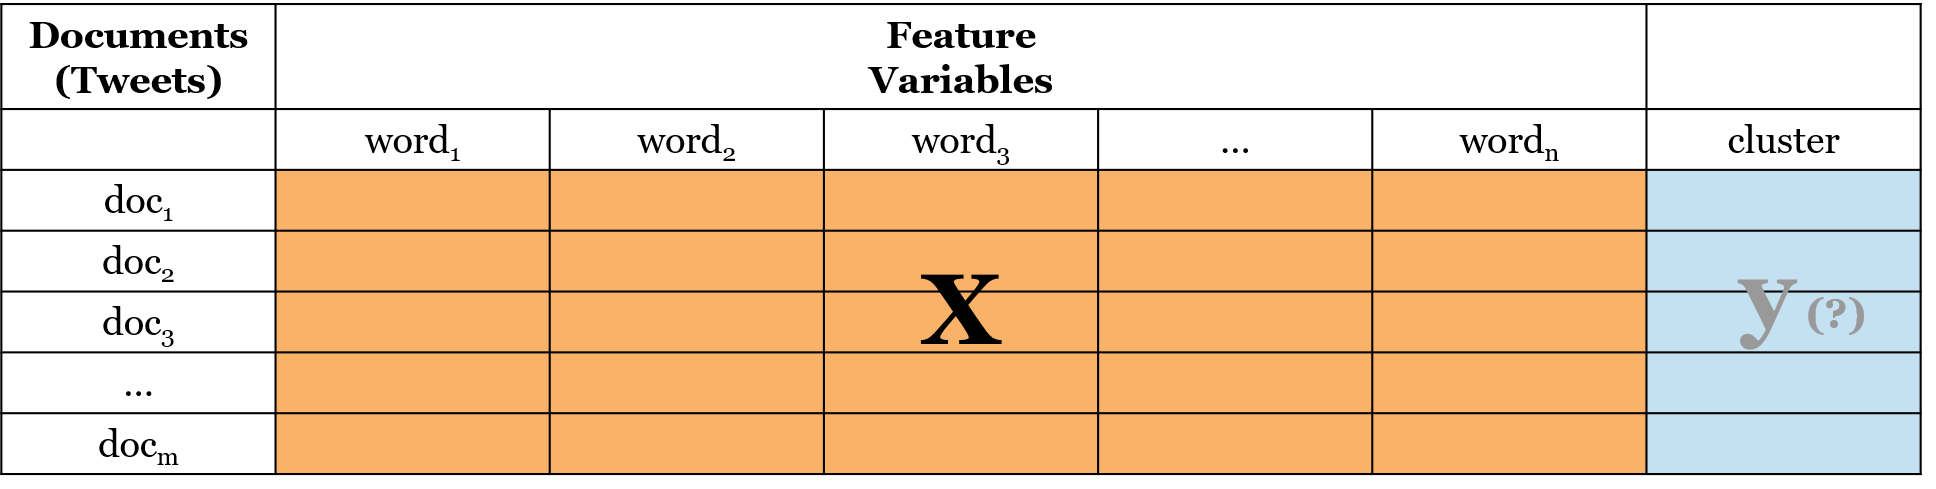

In [ ]:
from IPython.display import Image

Image(f"{classdata_folder}/images/clustering.png")

## Preparing Data for Modeling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df.body)

The words in the document-term matrix are used as features of the model and the documents are used as individual records of the model. Recall that there is no `y`, or the outcome variable, in unsupervised learning. Note also that we do not split the dataset into a training set and a test set in unsupervised learning.  

In [ ]:
X.shape

(1347, 35977)

There are 1,347 documents, or records, and 35,977 words, or features.

## K-Means Clustering

### Step 1. Choose the number of clusters

In [ ]:
k = 5

### Step 2. Initialize a model object for k-means clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0) # centroid random .. random state(seed) 값을 줌으로써 random 상태 조절(항상 동일한 결과가 나오도록)
kmeans

KMeans(n_clusters=5, random_state=0)

sklearn.cluster.KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Step 3. Fit the model using the input data .. training

In [ ]:
%time kmeans.fit(X)

CPU times: user 3.33 s, sys: 25.4 ms, total: 3.36 s
Wall time: 2.17 s


KMeans(n_clusters=5, random_state=0)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster.

In [ ]:
kmeans.cluster_centers_ # centroid 의 vector space의 좌표값

array([[0.00000000e+00, 1.69065654e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.31194042e-03, 1.05411815e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.09070351e-03, 6.64966655e-03, 7.83084227e-05, ...,
        0.00000000e+00, 7.83084227e-05, 1.07654512e-04],
       [3.48580911e-03, 7.71123436e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.16640904e-03, 3.13691832e-03, 0.00000000e+00, ...,
        9.49040100e-05, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
kmeans.cluster_centers_.shape

(5, 35977)

Each value in the `kmeans.cluster_centers_` array is the coordinates of a centroid in a multi-dimensional space with about 16,500 dimensions.

In [ ]:
kmeans.labels_

array([4, 2, 1, ..., 2, 2, 4], dtype=int32)

In [ ]:
df["cluster"] = kmeans.labels_

In [ ]:
df[["title", "body", "cluster"]]

,title,body,cluster
0,The New Jersey Devils Are Scorching The NHL Again,"NHL The New Jersey Devils Are Scorching The NHL Again By Neil Paine Nov. 18, 2022, at 9:15 AM Y...",4
1,How Many Turkey Trotters Can You Pass?,"The Riddler How Many Turkey Trotters Can You Pass? By Zach Wissner-Gross Nov. 18, 2022, at 8:00 AM Il...",2
2,"Election Denialism Lives On, Even As Candidates Who Support It Concede","Polla Election Denialism Lives On, Even As Candidates Who Support It Concede By Zoha Qamar Nov. 18, 2022, at 6:00 AM ...",1
3,The Midterms Made State Governments Bluer,"2022 Election The Midterms Made State Governments Bluer By Nathaniel Rakich Nov. 17, 2022, at 6:00 AM ...",1
4,Kyrie Irving's Stats Aren't Worth The Drama,"NBA Kyrie Irving's Stats Aren't Worth The Drama By Santul Nerkar Nov. 17, 2022, at 11:54 AM Eve...",4
...,...,...,...
1342,What The Latest Crime Data Can — And Can’t — Tell Us,"This week, the FBI released nationwide crime numbers from 2020 that will likely contribute to the already tense political debate over crime and p...",0
1343,Sadio Mané Never Went Away,"When Liverpool signed Sadio Mané in the summer of 2016, the Merseyside club knew it was getting a dynamic attacking player. Still in his early 20...",4
1344,Why Some White Evangelicals Are Rethinking Their Politics,"White evangelicals are often seen as a solidly Republican voting bloc. In the 2020 election, 84 percent of them voted for Donald Trump. In fact, ...",2
1345,"White, Evangelical And … Progressive","Welcome to Political Outliers, a column that explores groups of Americans who are often portrayed as all voting the same way. In today’s climate,...",2


In [ ]:
df.cluster.value_counts()

4    451
2    421
1    245
0    160
3     70
Name: cluster, dtype: int64

Note that k-means clustering neither names the clusters nor gives any additional information about the clusters. It just yields cluster labels in numbers. It is you to identify each cluster.  

In [ ]:
cluster_1st, cluster_2nd, cluster_3rd, cluster_4th, cluster_5th = df.cluster.value_counts().index

In [ ]:
cluster_1st

4

이제 각 cluster의 실체를 파악해야함 > 10개 sample 뽑아서 보기(sampling)

In [ ]:
df[df.cluster == cluster_1st].sample(10, random_state=0)[["title", "cluster"]]          # the largest cluster

,title,cluster
428,Edwin Díaz And Francisco Lindor Aren't Busts Anymore — And Neither Are The Mets,4
170,Tom Brady Used To Put The Team On His Back. Now He Needs Help — And Isn't Getting It.,4
877,The Denver Broncos Traded For Russell Wilson To End Their QB Merry-Go-Round,4
949,NFL Teams Are Making Brian Flores’s Case For Him,4
784,MLB's Best Players Didn't Win Much Last Year. This Year Could Be Different.,4
471,Han Xu Is Unlike Any Player The WNBA Has Seen,4
38,How The Entire NFC East Can Make The Playoffs,4
1135,Which WNBA Teams Get The Most Out Of The Draft Lottery?,4
885,These NHL Players Deserve A Raise,4
253,Everyone’s A Favorite In Our 2022-23 NBA Forecast,4


noise가 있을 수 있음

In [ ]:
df[df.cluster == cluster_2nd].sample(10, random_state=0)[["title", "cluster"]]          # the second largest cluster

,title,cluster
520,The Datasets We’re Looking At This Week,2
1131,Why Biden Can’t Win On Inflation,2
102,Kevin McCarthy Doesn’t Have Enough Fans Inside The House … Or Outside It,2
427,Breaking Down The High-Stakes Elections In Wyoming And Alaska,2
546,Outdoor Tennis Could Be Sports’ First Big Climate Change Casualty,2
674,The 19-Year-Old Spanish Tennis Star Coming For Rafael Nadal’s Throne,2
37,The Butterfly Effect,2
931,We’re Hiring A Senior Editor For Interactives,2
708,How My Fitness Tracker Turned Me Against Myself,2
1010,What Will Biden’s Supreme Court Nominee Mean For Democrats — And The Midterms?,2


In [ ]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

df["words"] = df.title.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

import string
global_stopwords = nltk.corpus.stopwords.words("english")
local_stopwords = [c for c in string.punctuation] + ['‘', '’', '—', '…', "'s", "n't", "'re"]

from collections import Counter

def get_counter(dataframe, stopwords=[]):
    counter = Counter()

    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word not in stopwords:
                word_set.add(word)

        counter.update(word_set)

    return counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
counter_1st = get_counter(df[df.cluster == cluster_1st], global_stopwords+local_stopwords)
counter_1st.most_common(30)

[('nfl', 38),
 ('nba', 31),
 ('teams', 28),
 ('football', 23),
 ('world', 23),
 ('college', 23),
 ('best', 22),
 ('year', 21),
 ('new', 19),
 ('back', 18),
 ('season', 18),
 ('cup', 17),
 ('could', 17),
 ('wnba', 16),
 ('mlb', 15),
 ('2022', 14),
 ('playoff', 14),
 ('playoffs', 14),
 ('might', 14),
 ('team', 14),
 ('defense', 14),
 ('watch', 13),
 ('still', 12),
 ('nhl', 11),
 ('big', 11),
 ('series', 11),
 ('good', 11),
 ('way', 10),
 ('title', 10),
 ('last', 10)]

In [ ]:
counter_2nd = get_counter(df[df.cluster == cluster_2nd], global_stopwords+local_stopwords)
counter_2nd.most_common(30)

[('americans', 58),
 ('looking', 31),
 ('week', 28),
 ('datasets', 28),
 ('biden', 24),
 ('democrats', 18),
 ('supreme', 18),
 ('court', 18),
 ('win', 17),
 ('could', 16),
 ('republicans', 15),
 ('change', 15),
 ('support', 14),
 ('buy', 14),
 ('republican', 13),
 ('voters', 13),
 ('chess', 13),
 ('many', 12),
 ('want', 12),
 ('world', 12),
 ('make', 11),
 ('covid-19', 11),
 ('politics', 9),
 ('climate', 9),
 ('us', 9),
 ('6', 9),
 ('black', 9),
 ('hiring', 9),
 ('trump', 8),
 ('political', 8)]

## LDA Topic Modeling

## Setting the Goal

Our goal is to build a <b>topic</b> model that is able to find abstract topics in the tweets.
- Feature variables: words in web pages
- Records          : documents (web pages)

### Step 1. Choose the number of topics

In [ ]:
num_topics = 5

### Step 2. Initialize a model object for LDA topic modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(n_components=5, random_state=0)

sklearn.decomposition.LatentDirichletAllocation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### Step 3. Fit the model using the input data

In [ ]:
%time lda.fit(X)

CPU times: user 9.47 s, sys: 32.3 ms, total: 9.51 s
Wall time: 13.1 s


LatentDirichletAllocation(n_components=5, random_state=0)

### Step 4. Examine the output of topic modeling

In [ ]:
lda.components_ # 각 topic마다 하나하나의 term .. term들의 점수값(weight 값) .. topic의 실체 > weighted words

array([[0.20002131, 0.20000932, 0.20001654, ..., 0.20001852, 0.20001654,
        0.20001765],
       [0.2000096 , 0.20000933, 0.20001654, ..., 0.20001852, 0.20001654,
        0.20001765],
       [1.72382703, 0.41923008, 0.20001144, ..., 0.21569008, 0.20001144,
        0.20001129],
       [4.27380116, 7.58788263, 0.23290678, ..., 0.22705607, 0.23290678,
        0.24525831],
       [0.2000096 , 0.20000933, 0.20001654, ..., 0.20001852, 0.20001654,
        0.20001765]])

In [ ]:
lda.components_.shape

(5, 35977)

In [ ]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [ ]:
# 이 부분 코드를 분석해봐야함 (숙제)

In [ ]:
vectorizer.get_feature_names_out().argsort()[::-1]

array([35976, 35975, 35974, ...,     2,     1,     0])

In [ ]:
show_topics(lda, vectorizer.get_feature_names_out(), 10) # components들의 점수를 sorting .. 원래 끝이 35977까지 간다 .. 10까지 자른 것

*** Topic 0:
0.85 * świątek + 0.80 * shiffrin + 0.57 * slalom + 0.52 * navratilova + 0.46 * shriver + 0.43 * graf + 0.26 * iga + 0.22 * steffi + 0.22 * skier + 0.21 * doha

*** Topic 1:
0.99 * hd + 0.52 * ld + 0.20 * overreaction + 0.20 * counterevidence + 0.20 * current3 + 0.20 * outran + 0.20 * races4 + 0.20 * overestimating + 0.20 * map6 + 0.20 * environment2

*** Topic 2:
40.89 * season + 28.17 * team + 24.51 * game + 20.37 * teams + 17.40 * league + 15.76 * nba + 15.41 * games + 12.94 * players + 12.34 * playoff + 11.30 * defense

*** Topic 3:
53.44 * percent + 36.34 * election + 35.65 * democrats + 34.70 * abortion + 31.88 * state + 31.72 * republicans + 30.61 * americans + 28.59 * republican + 28.51 * trump + 27.74 * said

*** Topic 4:
0.56 * robot + 0.28 * slices + 0.27 * pizza + 0.26 * shop + 0.20 * krupnikov + 0.20 * hopelessly + 0.20 * yanna + 0.20 * figure + 0.20 * episode + 0.20 * lattes



Note that, just like k-means clustering, LDA topic modeling does not name the topics. It is up to you to identify each topic with its contributing words.  

### Topic Model Visualization

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


pyLDAvis: https://github.com/bmabey/pyLDAvis

In [ ]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer) #숫자랑 순서가 일치하지는 않음,, 하나하나 매핑은 된다 // 결과가 별로 안좋은게 1,2는 큰데 나머지 3,4,5가 별로 구분되지 않음 topic 끼리 distinctive 하지 않음

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/root/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.098481 -0.001238       1        1  70.568284
2     -0.022283  0.049218       2        1  24.867998
0     -0.025430 -0.016015       3        1   1.529720
1     -0.025395 -0.015991       4        1   1.519732
4     -0.025373 -0.015974       5        1   1.514266, topic_info=              Term      Freq      Total Category  logprob  loglift
28760       season  15.00000  15.000000  Default  30.0000  30.0000
32034         team  14.00000  14.000000  Default  29.0000  29.0000
14136         game  13.00000  13.000000  Default  28.0000  28.0000
32042        teams   8.00000   8.000000  Default  27.0000  27.0000
19031       league   6.00000   6.000000  Default  26.0000  26.0000
...            ...       ...        ...      ...      ...      ...
19952       madrid   0.00679   0.290633   Topic5 -10.4906   0.4337
3157        aloneâ   0.00679   0.282815   Topic5 -10.4906   0.4609
8092   concussions   0.00679   0.282815   Topic5 -10.4906   0.4609
10793    dizziness   0.00679   0.282815   Topic5 -10.4906   0.4609
17602          itâ   0.00679   0.282815   Topic5 -10.4906   0.4609

[293 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
2357       1  1.012516   abortion
3262       1  0.983410  americans
4013       2  0.899189     astros
4449       1  0.230369       ball
4449       2  0.691108       ball
...      ...       ...        ...
35430      2  0.758184       wnba
35713      2  0.996910    yankees
35722      2  0.994457      yards
35737      1  0.765351       year
35737      2  0.306140       year

[120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

- Saliency: a measure of how much the term tells you about the topic.
- Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.
- Bubble size: the importance of the topics, relative to the data.